## TFMaster 1. image classification 

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Softmax
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint
print(tf.__version__)

2.5.0


In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()



4423680/4422102 [==============================] - 0s 0us/step


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [7]:
y_train.shape

(60000,)

### preprocessing

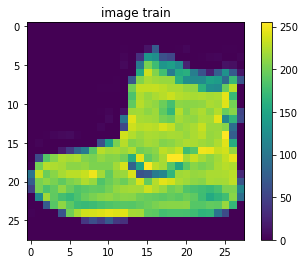

In [8]:
plt.figure()
plt.imshow(x_train[0])
plt.title('image train')
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
x_train = x_train/255
x_test = x_test/255

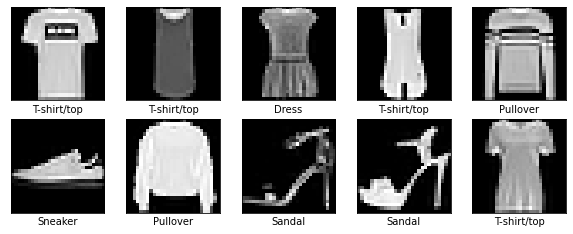

In [10]:
plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i+1],cmap='gray')
  plt.xlabel(class_names[y_train[i+1]])

## Modeling

In [11]:
model = tf.keras.Sequential([
                             Flatten(input_shape=(28,28,1)),
                             Dense(128,activation ='relu'),
                             Dense(64,activation ='relu'),
                             Dense(32,activation ='relu'),
                             Dense(10, activation = 'softmax')

])

In [12]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',metrics='acc')

**loss가 가장 적은 지점 추적**

In [43]:
checkpoint_path = 'my_checkpoint.ckpt'
checkpoint = ModelCheckpoint(checkpoint_path,
                             monitor='loss',
                             verbose=1,
                             save_best_only=True,
                             save_weights_only=True)
                             

In [48]:
history = model.fit(x_train,y_train,epochs=20, callbacks=[checkpoint])

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0916 - acc: 0.9643

Epoch 00001: loss improved from 0.09297 to 0.09163, saving model to my_checkpoint.ckpt
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0918 - acc: 0.9658

Epoch 00002: loss did not improve from 0.09163
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0906 - acc: 0.9664

Epoch 00003: loss improved from 0.09163 to 0.09057, saving model to my_checkpoint.ckpt
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0890 - acc: 0.9663

Epoch 00004: loss improved from 0.09057 to 0.08896, saving model to my_checkpoint.ckpt
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0886 - acc: 0.9664

Epoch 00005: loss improved from 0.08896 to 0.08860, saving model to my_checkpoint.ckpt
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0891 - acc: 0.9659

Epoch 00006: loss

In [45]:
model.load_weights(checkpoint_path)

__평가 및 예측__

In [46]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=1)

313/313 [==============================] - 0s 2ms/step - loss: 0.5760 - acc: 0.8931


In [21]:
predictions = model.predict(x_test)
print(predictions.shape)

(10000, 10)


In [17]:
np.argmax(predictions[1])
y_test[1]

2

### Plotting

In [36]:
 def plot_image(i, predictions_array, true_label, img):
   true_label, img = true_label[i], img[i]
   plt.xticks([])
   plt.yticks([])

   plt.imshow(img, cmap = plt.cm.binary)
   predicted_label = np.argmax(predictions_array)
   if predicted_label == true_label : 
      color = 'blue'
   else :
      color = 'red'
   plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 
                                        100*np.max(predictions_array),
                                        class_names[true_label],
                                        color='blue'))
 def plot_value_array(i,predictions_array, true_label):
  true_label = true_label[i]
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = '#7777')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

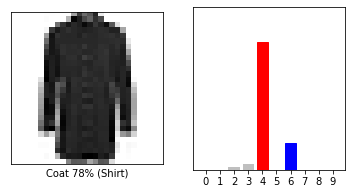

In [39]:
i=444

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i], y_test)
plt.show()


###  Loss 시각화

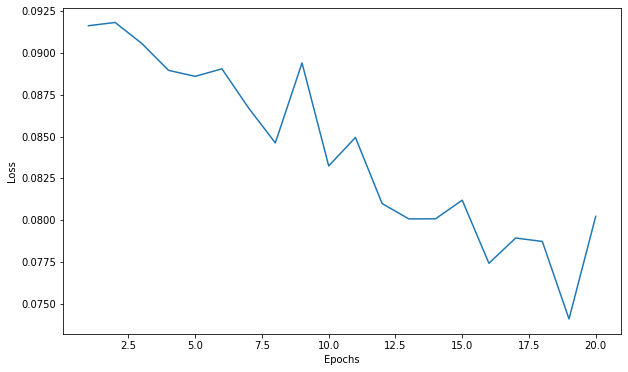

In [49]:
plt.figure(figsize=(10,6))
plt.subplot(1,1,1)
plt.plot(np.arange(1,21),history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()